In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data = pd.read_pickle("data.pickle")

In [4]:
data.sample(5)

,CO2/indoor/scd30 (ppm),RH/indoor/scd30 (%),T/indoor/scd30 (°C),T/indoor/lht65 (°C),T/outdoor/lht65 (°C),RH/indoor/lht65 (%),RH/outdoor/lht65 (%),RH/indoor/bme280 (%),p/indoor/bme280 (hPa),T/indoor/bme280 (°C),CO2/41R012 (ppm),RH/41R001 (%),T/41R001 (°C)
time,,,,,,,,,,,,,
2021-09-20 17:00:00+00:00,536.865771,39.584109,25.891469,24.080000,23.163333,47.266667,45.700000,24.950116,1019.236278,32.617988,403.5,57.5,16.85
2021-09-18 03:00:00+00:00,565.601863,49.103752,24.462526,23.630000,17.086667,54.300000,72.966667,30.784312,1012.359283,31.233108,424.5,82.5,15.10
2021-09-12 03:00:00+00:00,488.390597,47.990374,24.164320,23.896667,15.423333,53.100000,74.566667,30.100035,1015.096741,30.944929,426.0,86.0,13.40
2021-08-08 00:00:00+00:00,645.826302,51.622362,25.000165,23.816667,16.380000,56.400000,79.833333,32.452164,1001.422953,31.766789,397.0,82.0,15.50
2021-08-26 19:00:00+00:00,574.012218,48.976761,24.881901,23.500000,17.660000,55.333333,73.100000,30.809747,1014.167853,31.634995,398.5,76.5,16.45


In [5]:
def set_ts_axe(axe, title=""):
    axe.set_title(title)
    axe.set_xlabel("Time, $t$ [UTC]")
    axe.set_ylabel("Measure, $x(t)$")
    axe.legend(bbox_to_anchor=(1,1), loc="upper left")
    axe.grid()

In [6]:
def set_kde_axe(axe, title=""):
    axe.set_title(title)
    axe.set_xlabel("Measure, $x$")
    axe.set_ylabel("KDE Density, $\hat{f}(x)$")
    axe.legend(bbox_to_anchor=(1,1), loc="upper left")
    axe.grid()

In [7]:
co2net = data["CO2/indoor/scd30 (ppm)"] - data.interpolate()["CO2/41R012 (ppm)"]
co2net = co2net.to_frame()
co2net.columns = ["CO2/indoor/net (ppm)"]
co2net.columns.name = "seriekey"
co2net

seriekey,CO2/indoor/net (ppm)
time,
2021-08-01 00:00:00+00:00,143.243626
2021-08-01 01:00:00+00:00,136.820450
2021-08-01 02:00:00+00:00,122.576876
2021-08-01 03:00:00+00:00,78.597841
2021-08-01 04:00:00+00:00,64.637309
...,...
2021-09-24 03:00:00+00:00,418.033368
2021-09-24 04:00:00+00:00,427.381638
2021-09-24 05:00:00+00:00,450.335362


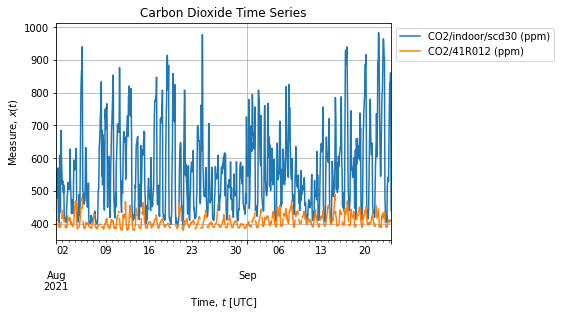

In [8]:
axe = data.filter(regex="CO2/").plot()
set_ts_axe(axe, "Carbon Dioxide Time Series")

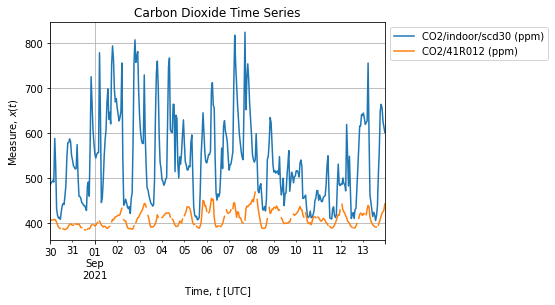

In [9]:
axe = data.filter(regex="CO2/").loc["2021-08-30":"2021-09-13",:].plot()
set_ts_axe(axe, "Carbon Dioxide Time Series")

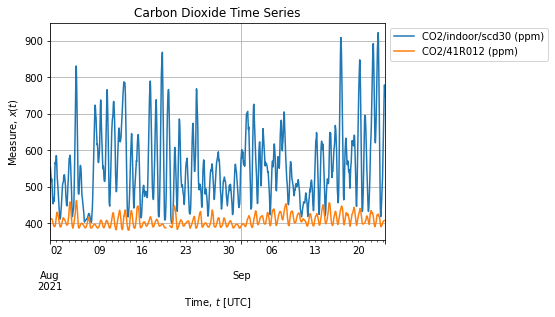

In [10]:
axe = data.filter(regex="CO2/").rolling(8, min_periods=2).mean().plot()
#axe.set_ylim([380, 440])
set_ts_axe(axe, "Carbon Dioxide Time Series")

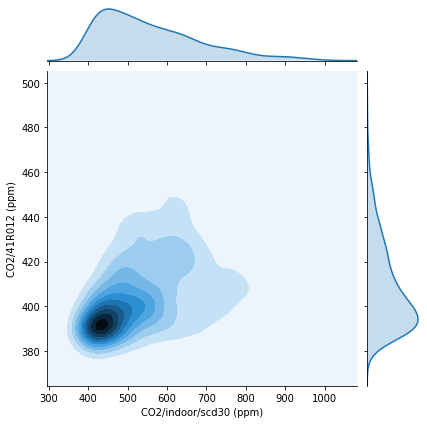

In [11]:
g = sns.jointplot(
    data=data,
    x="CO2/indoor/scd30 (ppm)", y="CO2/41R012 (ppm)",
    kind="kde",
)

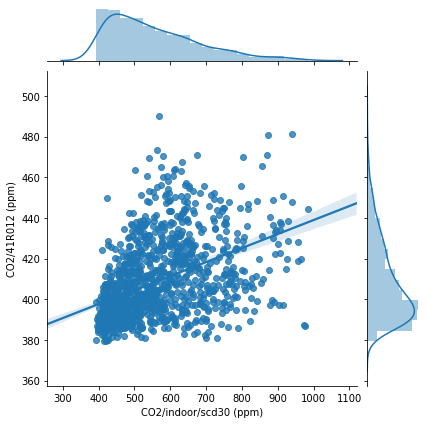

In [12]:
g = sns.jointplot(
    data=data,
    x="CO2/indoor/scd30 (ppm)", y="CO2/41R012 (ppm)",
                  kind="reg", truncate=False,)

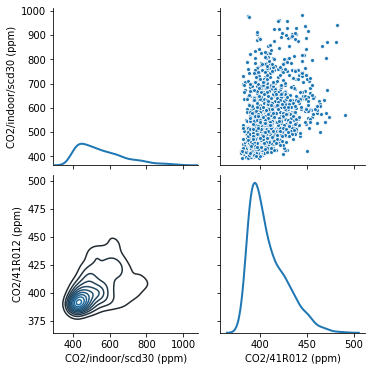

In [13]:
g = sns.PairGrid(data.filter(regex="CO2/"))
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

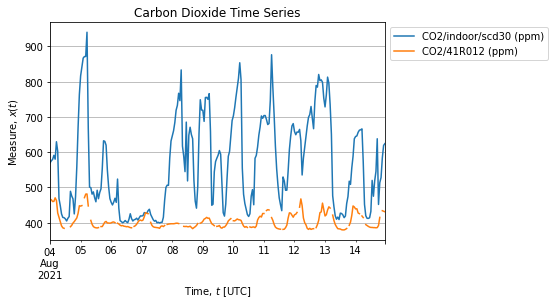

In [14]:
axe = data.filter(regex="CO2/").loc["2021-08-04":"2021-08-14",:].plot()
set_ts_axe(axe, "Carbon Dioxide Time Series")

(350.0, 1000.0)

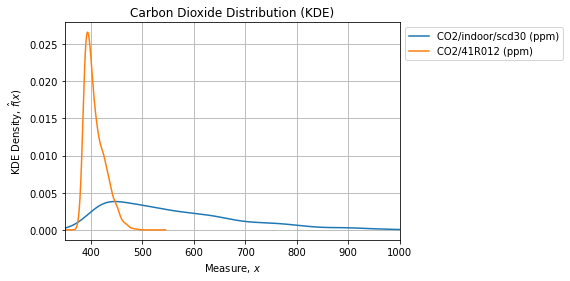

In [15]:
axe = data.filter(regex="CO2/").plot(kind="kde")
set_kde_axe(axe, "Carbon Dioxide Distribution (KDE)")
axe.set_xlim([350, 1000])

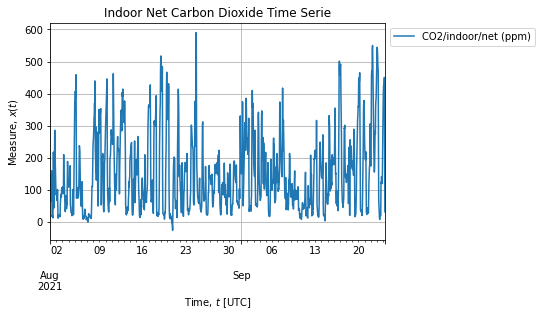

In [16]:
axe = co2net.plot()
set_ts_axe(axe, "Indoor Net Carbon Dioxide Time Serie")

In [17]:
p = stats.pareto.fit(co2net.dropna().values)
X = stats.pareto(*p)
x = np.linspace(-50, 600, 101)

/home/jlandercy/.local/lib/python3.6/site-packages/scipy-1.4.1-py3.6-linux-x86_64.egg/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(-50.0, 600.0)

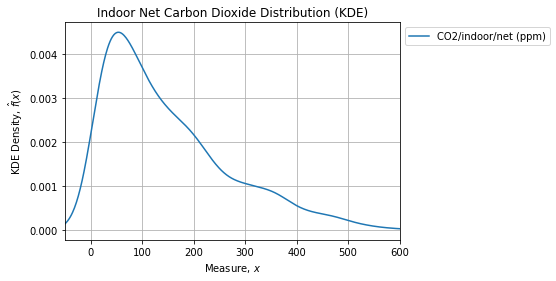

In [18]:
axe = co2net.plot(kind="kde")
#axe.plot(x, X.pdf(x), label="MLE")
set_kde_axe(axe, "Indoor Net Carbon Dioxide Distribution (KDE)")
axe.set_xlim([-50, 600])

<AxesSubplot:xlabel='time'>

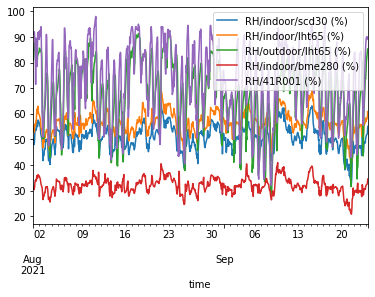

In [19]:
data.filter(regex="RH").plot()

<AxesSubplot:xlabel='time'>

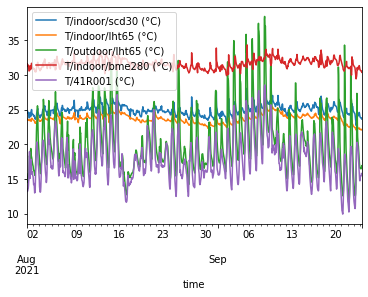

In [20]:
data.filter(regex="T").plot()

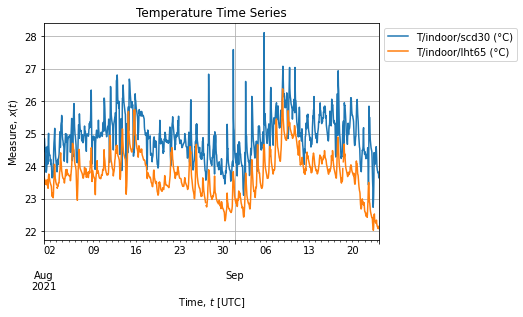

In [21]:
axe = data.filter(regex="T/indoor/(lht|scd)").plot()
set_ts_axe(axe, "Temperature Time Series")

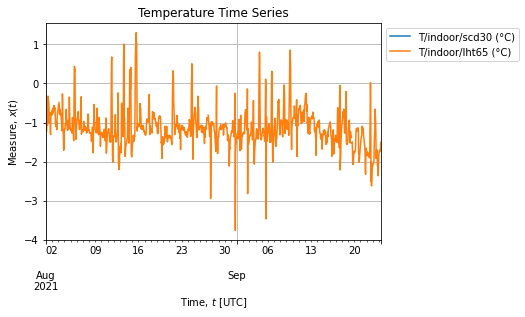

In [22]:
axe = data.filter(regex="T/indoor/(lht|scd)").diff(axis=1).plot()
set_ts_axe(axe, "Temperature Time Series")

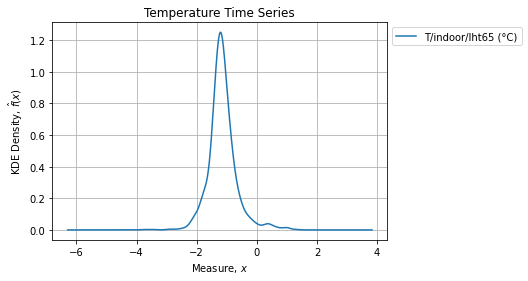

In [23]:
axe = data.filter(regex="T/indoor/(lht|scd)").diff(axis=1).drop("T/indoor/scd30 (°C)", axis=1).plot(kind="kde")
set_kde_axe(axe, "Temperature Time Series")

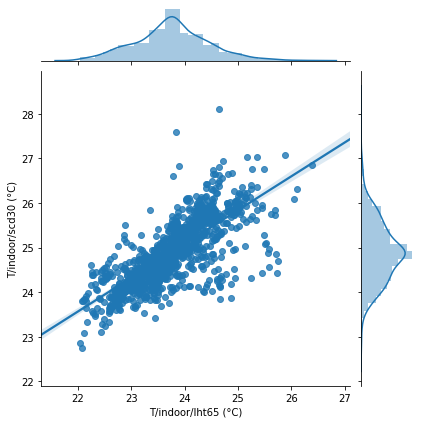

In [24]:
g = sns.jointplot(
    data=data,
    x="T/indoor/lht65 (°C)", y="T/indoor/scd30 (°C)",
                  kind="reg", truncate=False,)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'truncate'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


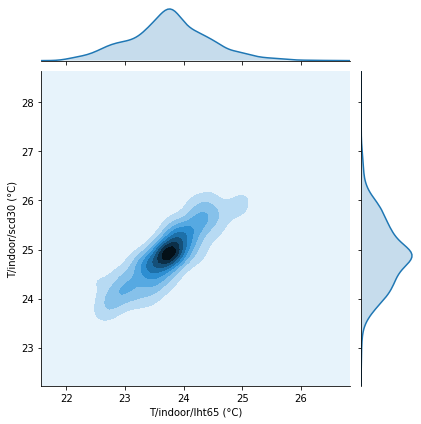

In [25]:
g = sns.jointplot(
    data=data,
    x="T/indoor/lht65 (°C)", y="T/indoor/scd30 (°C)",
                  kind="kde", truncate=False,)

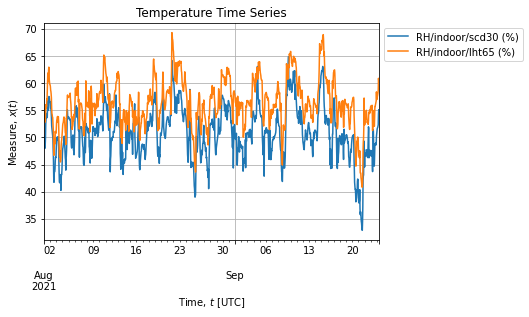

In [26]:
axe = data.filter(regex="RH/indoor/(lht|scd)").plot()
set_ts_axe(axe, "Temperature Time Series")

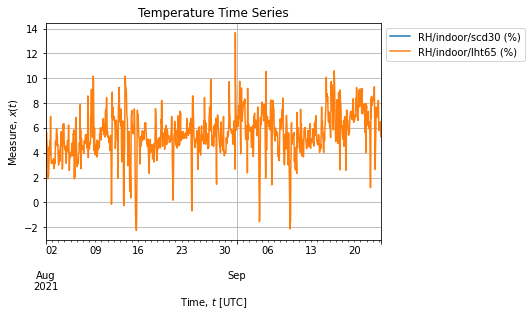

In [27]:
axe = data.filter(regex="RH/indoor/(lht|scd)").diff(axis=1).plot()
set_ts_axe(axe, "Temperature Time Series")

In [28]:
data.filter(regex="RH/indoor/(lht|scd)")

,RH/indoor/scd30 (%),RH/indoor/lht65 (%)
time,,
2021-08-01 00:00:00+00:00,50.055070,55.233333
2021-08-01 01:00:00+00:00,49.286815,54.533333
2021-08-01 02:00:00+00:00,48.229155,53.866667
2021-08-01 03:00:00+00:00,47.941203,53.033333
2021-08-01 04:00:00+00:00,48.232575,52.800000
...,...,...
2021-09-24 03:00:00+00:00,51.840831,57.933333
2021-09-24 04:00:00+00:00,52.047797,58.233333
2021-09-24 05:00:00+00:00,52.318859,58.700000


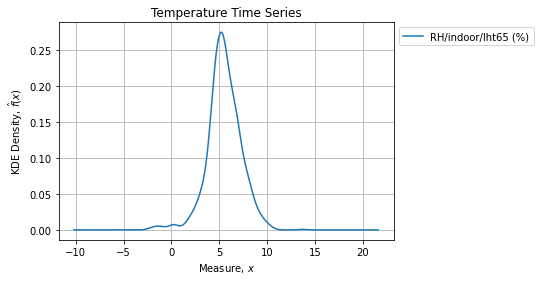

In [29]:
axe = data.filter(regex="RH/indoor/(lht|scd)").diff(axis=1).drop("RH/indoor/scd30 (%)", axis=1).plot(kind="kde")
set_kde_axe(axe, "Temperature Time Series")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'truncate'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


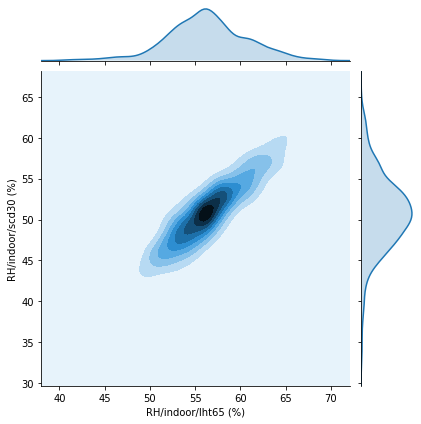

In [30]:
g = sns.jointplot(
    data=data,
    x="RH/indoor/lht65 (%)", y="RH/indoor/scd30 (%)",
                  kind="kde", truncate=False,)

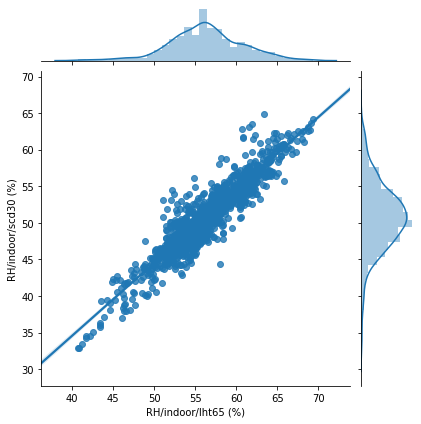

In [31]:
g = sns.jointplot(
    data=data,
    x="RH/indoor/lht65 (%)", y="RH/indoor/scd30 (%)",
                  kind="reg", truncate=False,)